In [22]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import joblib
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
import functions as f

### 1. Load Data

In [24]:
df91, df01 = f.load_data()

### 2. Process Data

In [25]:
pdf91 = f.process_data(df91, ['UniqueCarrier', 'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','Cancelled','Diverted'], 'reg')

In [26]:
pdf01 = f.process_data(df01, ['UniqueCarrier','TailNum' ,'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','TaxiIn','TaxiOut','Cancelled','Diverted'], 'reg')

In [27]:
pdf01.sample()

,UniqueCarrier,TailNum,Origin,Dest,Month,DayofMonth,DayOfWeek,DepTime,FlightNum,ActualElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,ArrDelay
944144,-0.944788,-0.448438,-0.23497,1.021825,-1.26904,-1.666653,0.025112,1.042834,0.213719,0.225816,-0.393683,0.535522,-0.292296,0.555371,0.0,0.0,-18.0


### 3. Modeling

#### 3.1 Decision Tree

In [28]:
dt91, acc_dt91 = f.train_dt(pdf91,'reg')
dt01, acc_dt01 = f.train_dt(pdf01,'reg')

In [29]:
feature_names = dt91.feature_names_in_  # Replace with the attribute name holding your feature names
importance_scores = dt91.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_dt_91 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

feature_importance_dt_91

,Feature,Importance
0,UniqueCarrier,0.010648
1,Origin,0.019586
2,Dest,0.018873
3,Month,0.011015
4,DayofMonth,0.003943
5,DayOfWeek,0.002838
6,DepTime,0.014835
7,FlightNum,0.012738
8,ActualElapsedTime,0.091529
9,DepDelay,0.729588


In [30]:
feature_names = dt01.feature_names_in_  # Replace with the attribute name holding your feature names
importance_scores = dt01.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_dt_01 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

feature_importance_dt_01

,Feature,Importance
0,UniqueCarrier,0.004038
1,TailNum,0.004993
2,Origin,0.009931
3,Dest,0.006871
4,Month,0.004511
5,DayofMonth,0.003437
6,DayOfWeek,0.001833
7,DepTime,0.007558
8,FlightNum,0.007319
9,ActualElapsedTime,0.027987


#### 3.1 XG Boost

In [31]:
xgb91, acc_xgb91 = f.train_xgb(pdf91,'reg')
xgb01, acc_xgb01 = f.train_xgb(pdf01,'reg')

### 4. Results


#### 4.1 Accuracies

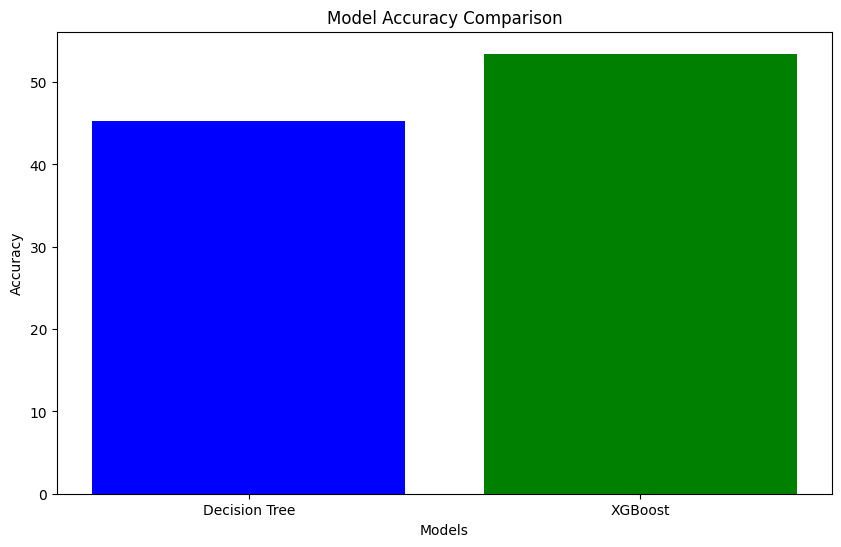

In [32]:
f.plot_model_accuracy([acc_dt91,acc_xgb91])

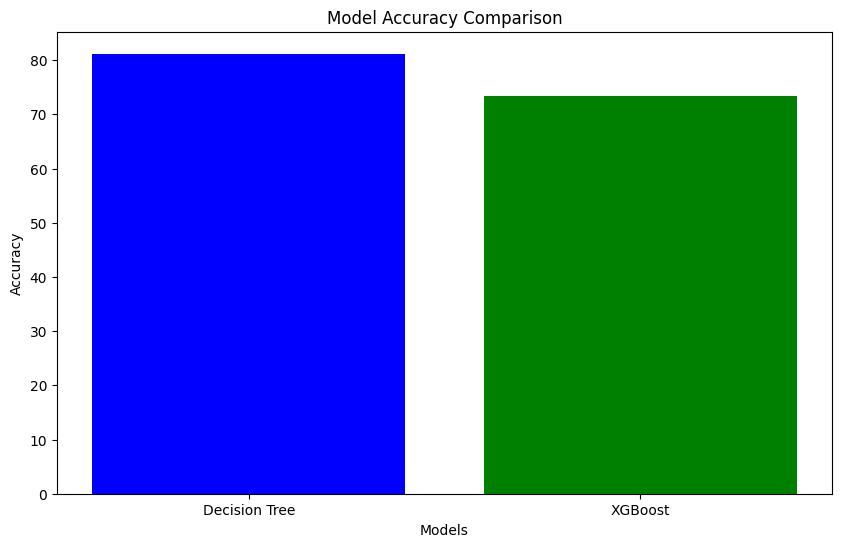

In [33]:
f.plot_model_accuracy([acc_dt01,acc_xgb01])

- Save Accuracies

In [34]:
pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'Year 91': [acc_dt91, acc_xgb91],
    'Year 01': [acc_dt01, acc_xgb01]
}).to_csv('Data/accuracies.csv',index=False)

#### 4.2 Feature Importance

In [35]:
dt_feature_importance_91 = f.feature_importance(dt91)

In [36]:
xgb_feature_importance_91 = f.feature_importance(xgb91)

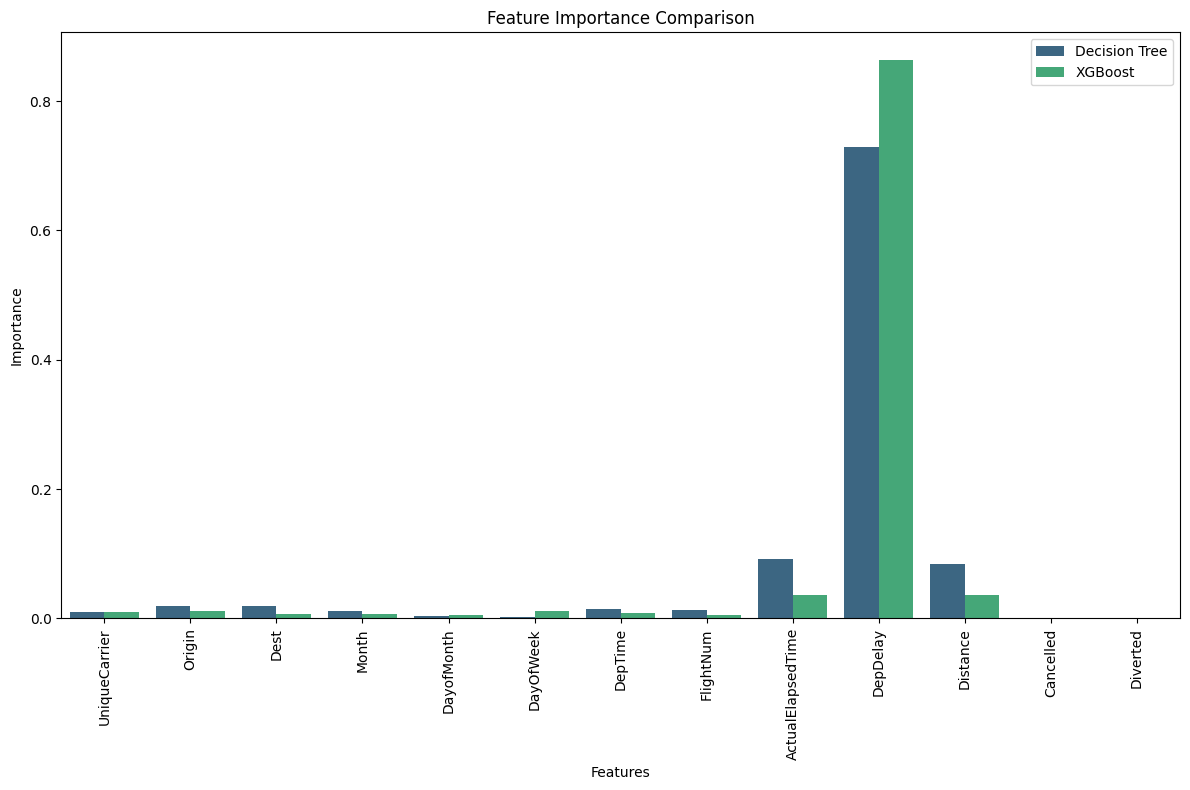

In [37]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_91, xgb_feature_importance_91)

f.plot_feature_importance(combined_feature_importance)

In [38]:
# combined_feature_importance.to_csv('Data/features_importance_91.csv')

In [39]:
dt_feature_importance_01 = f.feature_importance(dt01)

In [40]:
xgb_feature_importance_01 = f.feature_importance(xgb01)

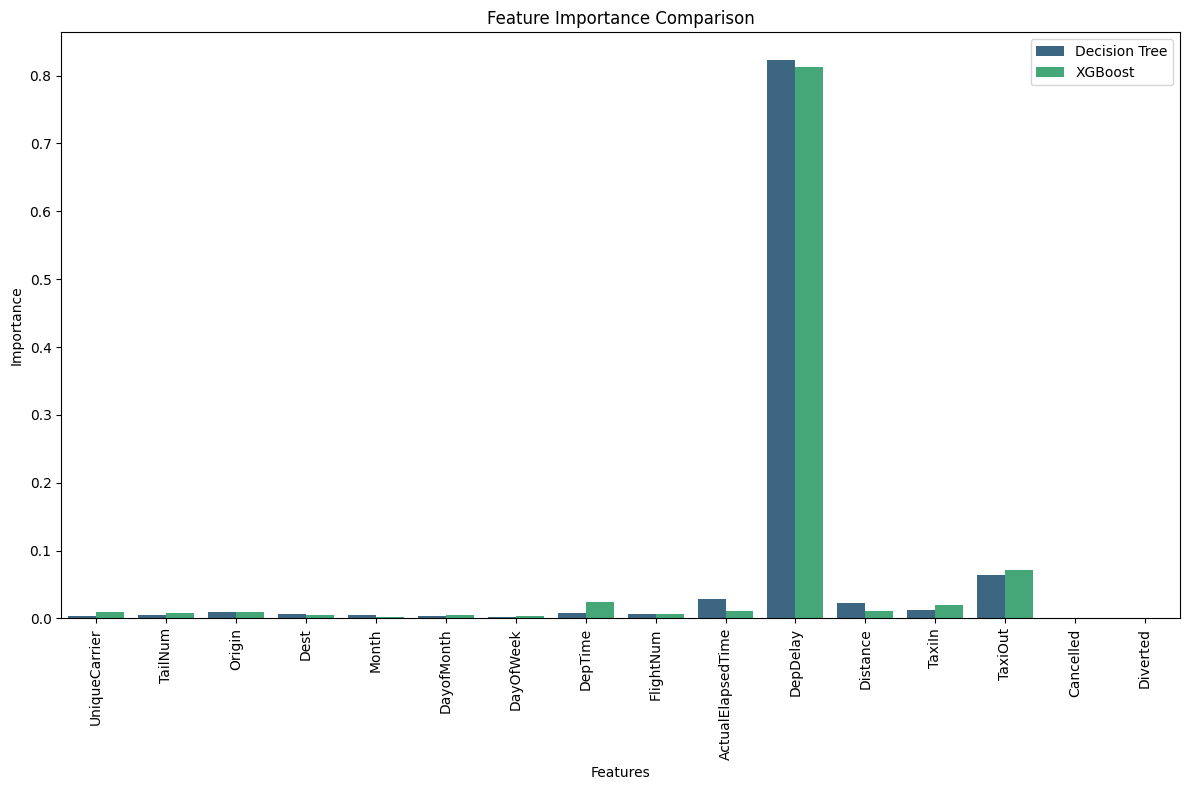

In [41]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_01, xgb_feature_importance_01)

f.plot_feature_importance(combined_feature_importance)

In [42]:
# combined_feature_importance.to_csv('Data/features_importance_01.csv')